# Multilayer Perceptrons

In Section 4, we introduced softmax regression (Section 4.1), implementing the algorithm from scratch (Section 4.4) and using high-level APIs (Section 4.5). This allowed us to train classifiers capable of recognizing 10 categories of clothing from low-resolution images. Along the way, we learned how to wrangle data, coerce our outputs into a valid probability distribution, apply an appropriate loss function, and minimize it with respect to our model’s parameters. Now that we have mastered these mechanics in the context of simple linear models, we can launch our exploration of deep neural networks, the comparatively rich class of models with which this book is primarily concerned.

## Activation Functions

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. They are differentiable operators to transform input signals to outputs, while most of them add non-linearity. Because activation functions are fundamental to deep learning, let’s briefly survey some common activation functions.

### ReLU Function

Informally, the ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0. To gain some intuition, we can plot the function. As you can see, the activation function is piecewise linear.

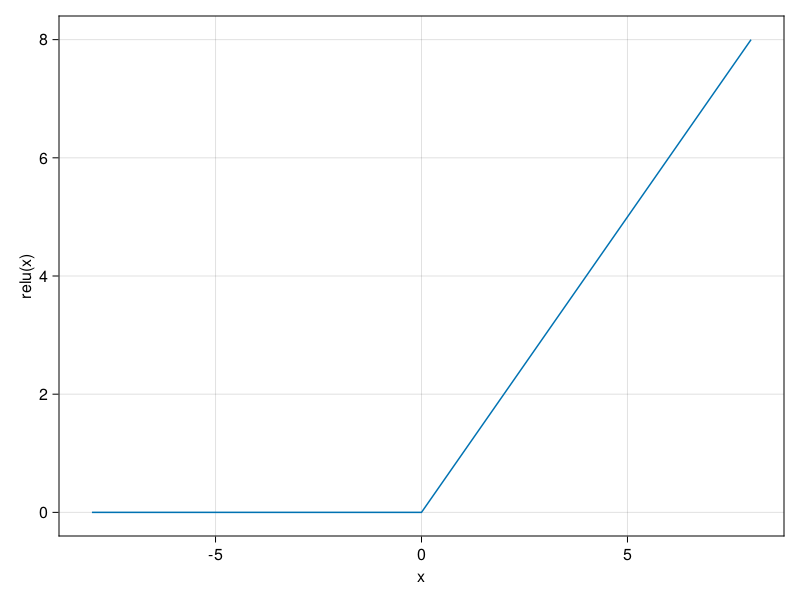

In [1]:
using CairoMakie
using Flux

x = -8.0:0.1:8.0
lines(x,relu;axis = (;xlabel = "x",ylabel="relu(x)"))

When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1. Note that the ReLU function is not differentiable when the input takes value precisely equal to 0. In these cases, we default to the left-hand-side derivative and say that the derivative is 0 when the input is 0. We can get away with this because the input may never actually be zero (mathematicians would say that it is nondifferentiable on a set of measure zero). There is an old adage that if subtle boundary conditions matter, we are probably doing (real) mathematics, not engineering. That conventional wisdom may apply here, or at least, the fact that we are not performing constrained optimization (Mangasarian, 1965, Rockafellar, 1970). We plot the derivative of the ReLU function plotted below.

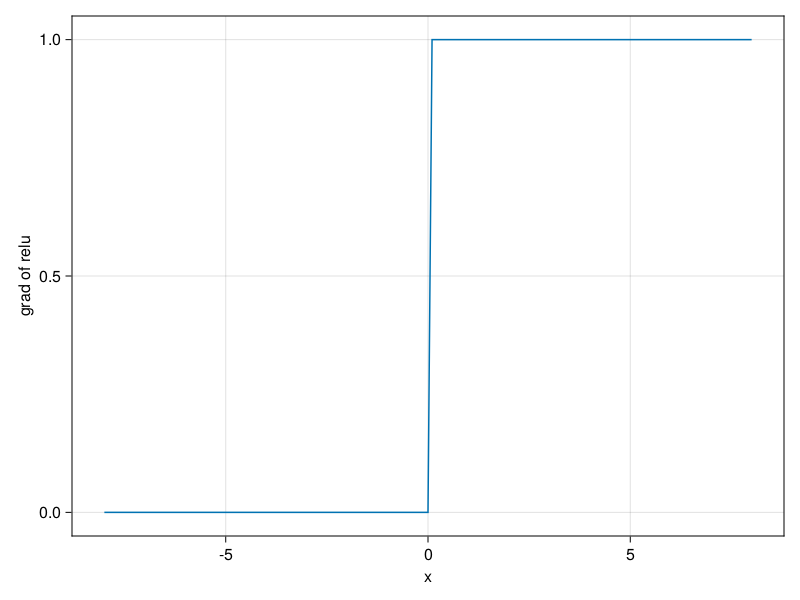

In [2]:
using Zygote

lines(x,relu';axis = (;xlabel = "x",ylabel="grad of relu"))

## Sigmoid Function

Below, we plot the sigmoid function. Note that when the input is close to 0, the sigmoid function approaches a linear transformation.

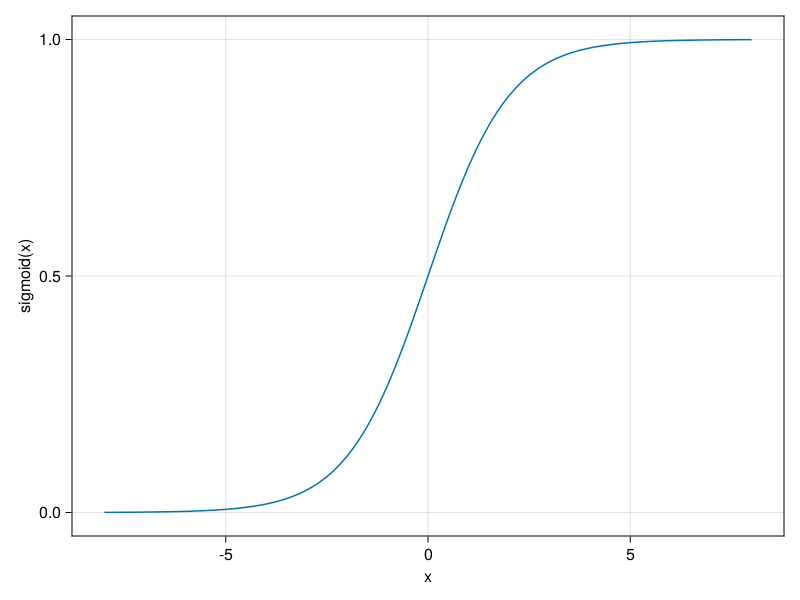

In [3]:
lines(x,sigmoid;axis = (;xlabel = "x",ylabel="sigmoid(x)"))

The derivative of the sigmoid function is plotted below. Note that when the input is 0, the derivative of the sigmoid function reaches a maximum of 0.25. As the input diverges from 0 in either direction, the derivative approaches 0.

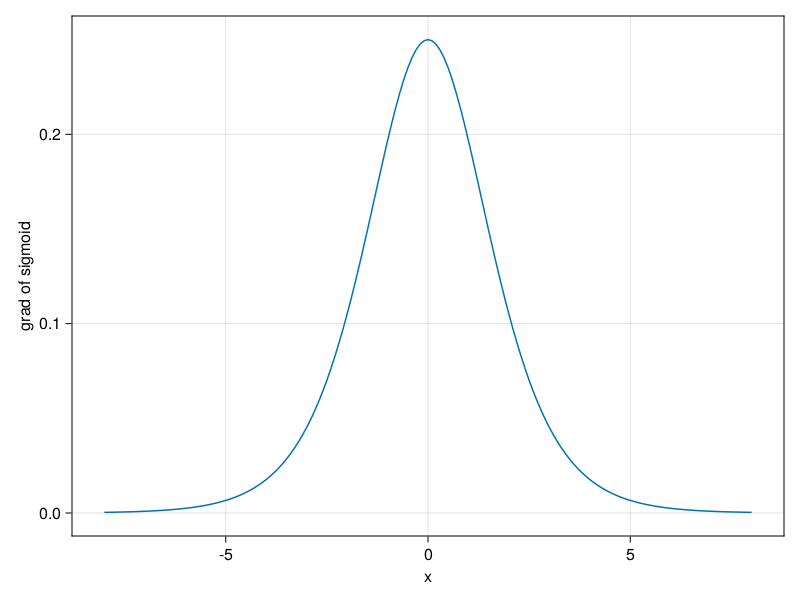

In [4]:
lines(x,sigmoid';axis = (;xlabel = "x",ylabel="grad of sigmoid"))

## Tanh Function

We plot the tanh function below. Note that as input nears 0, the tanh function approaches a linear transformation. Although the shape of the function is similar to that of the sigmoid function, the tanh function exhibits point symmetry about the origin of the coordinate system (Kalman and Kwasny, 1992).

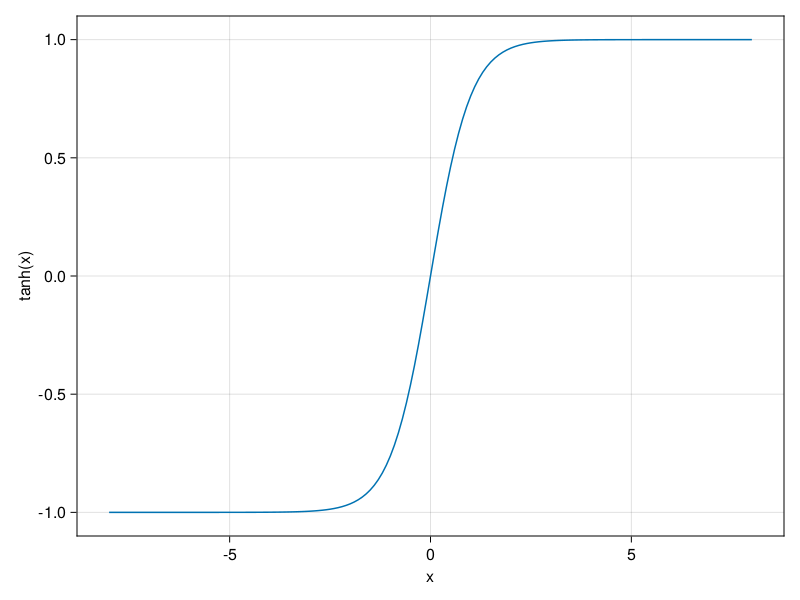

In [5]:
lines(x,tanh;axis = (;xlabel = "x",ylabel="tanh(x)"))

It is plotted below. As the input nears 0, the derivative of the tanh function approaches a maximum of 1. And as we saw with the sigmoid function, as input moves away from 0 in either direction, the derivative of the tanh function approaches 0.

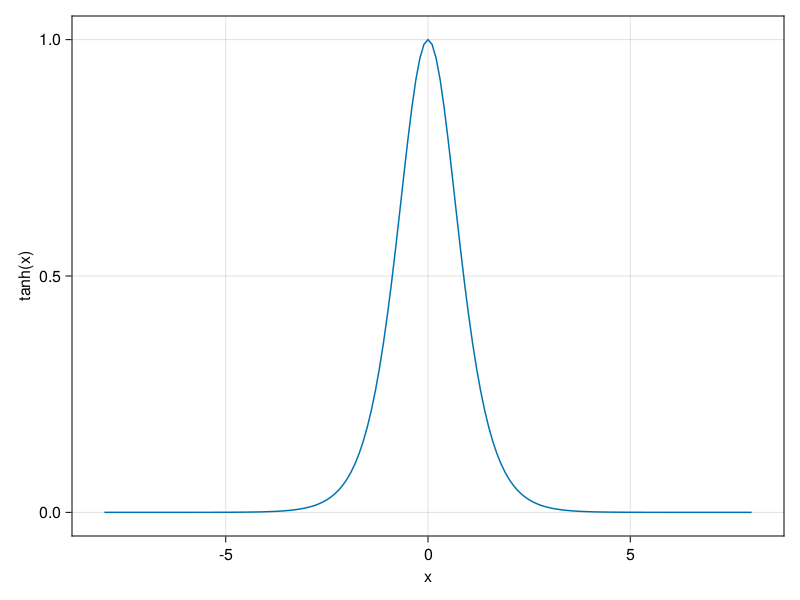

In [6]:
lines(x,tanh';axis = (;xlabel = "x",ylabel="tanh(x)"))